In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class Numerical_methods:
    
    def __init__(self,lorenz):  
        
        self.lorenz = lorenz
        self.x = []
        self.t = []
        self.N_dim = None
        
        
    def Initialise(self, x_start, t_start):
        
        self.N_dim = len(x_start)
        self.x = x_start
        self.t = t_start
    
    def MidPoint(self, dt, N_iter):
        
        X = np.zeros([self.N_dim, N_iter])
        T = np.zeros([N_iter])
        
        X[:, 0] = np.copy(self.x)
        T[0] = np.copy(self.t)
        
        for n in range(1, N_iter):
            
            x_mp = self.x + dt / 2 * self.lorenz(self.x, self.t)
            self.x = self.x + dt * self.lorenz(x_mp, self.t + dt / 2)
            
            X[:, n] = np.copy(self.x)
            
            self.t = self.t + dt
            T[n] = np.copy(self.t)
            
        return X, T
    


In [28]:
#Function to define lorenz function
#The function returns an array z that contains the rates of change of the state variables of x[0],x[1],x[2]
def lorenz(x,t):
    sigma = 10
    rho = 28
    beta = 8/3
    z=np.zeros([np.shape(x)[0]])
    z[0]=sigma*(x[1]-x[0])
    z[1]=x[0]*(rho-x[2])-x[1]
    z[2]=x[0]*x[1]-beta * x[2]
    return z

#Initializing initial conditions
dt = 0.03
N_iter = 5000
x_start=[10,10,10]     
t_start=0.

#initializing Numerical_method class
NM=Numerical_methods(lorenz) 
NM.Initialise(x_start,t_start) 

#Used Numerical_method midpoint point theorem to simulate the lorenz system
X_MP,ts=NM.MidPoint(dt,N_iter)


Text(0.5, 0, 'x')

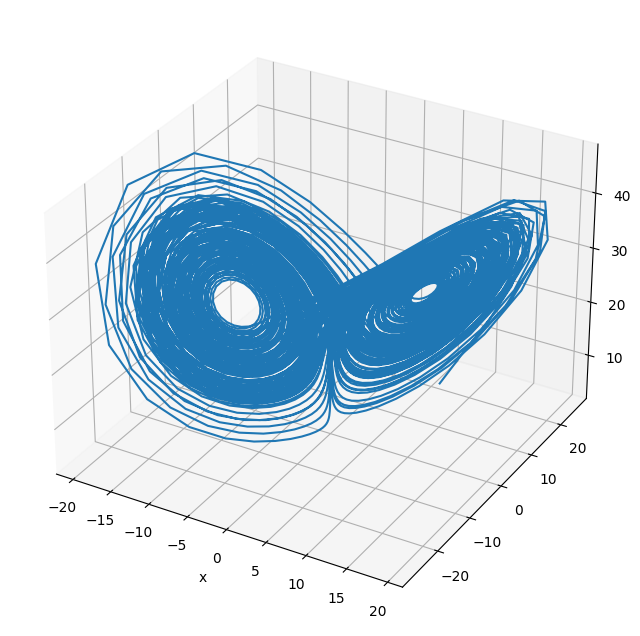

In [23]:
#Plotting the Results.
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_MP[0,:], X_MP[1,:], X_MP[2,:])
ax.set_xlabel('x')
